Example of anomaly detection using symmetric Variational Autoencoder as in
 Pu, Yunchen, et al. "Symmetric variational autoencoder and connections to adversarial learning." arXiv preprint arXiv:1709.01846 (2017).

In [1]:
using PyPlot, JLD, AnomalyDetection, EvalCurves
import PyPlot: plot
include("./plots.jl")

PyPlot.plot

In [2]:
# load data
dataset = load("toy_data_3.jld")["data"]
X = AnomalyDetection.Float.(dataset.data)
Y = dataset.labels;
nX = X[:,Y.==0]

2×90 Array{Float32,2}:
 0.803442  0.804605  0.807145  0.819485  …  0.0350314  0.0613807  0.0685027
 0.821998  0.834235  0.826129  0.848182     0.973926   1.00745    0.973256 

In [3]:
# sVAE settings
indim = size(X,1)
hiddendim = 10
latentdim = 2
nlayers = 2
N = size(nX,2)

# setup the VAE object
ensize = [indim; hiddendim; hiddendim; latentdim*2] # encoder architecture
decsize = [latentdim; hiddendim; hiddendim; indim] # decoder architecture
dissize = [indim + latentdim; hiddendim; hiddendim; 1] # discriminator architecture
lambda = 0.0 # weight of the data error term
threshold = 0 # classification threshold, is recomputed during fit!()
contamination = size(Y[Y.==1],1)/size(Y, 1) # for automatic threshold computation
iterations = 10000
cbit = 5000 # after this number of iteratiosn, callback is printed
verbfit = true
batchsize = 50 # batchsize
M = 1 #  number of samples of X in reconstruction error
activation = Flux.relu
layer = Flux.Dense
rdelta = 1e-4 # reconstruction error threshold for training stopping
alpha = 0.5 # weighs between reconstruction error and discriminator score for classification
# 0 = only reconstruction error, 1 = only discriminator score
Beta = 1.0 # for automatic threshold computation, in [0, 1] 
# 1.0 = tight around normal samples
tracked = true # do you want to store training progress?
# it can be later retrieved from model.traindata
xsigma = 1.0 # static estimate of data variance
eta = 0.001
model = sVAEmodel(ensize, decsize, dissize; lambda=lambda, threshold=threshold, 
    contamination=contamination, iterations=iterations, cbit=cbit, 
    verbfit=verbfit, batchsize=batchsize, 
    M = M, activation = activation, rdelta = rdelta, Beta = Beta, xsigma = xsigma,
    tracked = tracked, layer = layer, eta = eta)

AnomalyDetection.sVAEmodel(AnomalyDetection.sVAE(Chain(Dense(2, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 4)), AnomalyDetection.sample_z, Chain(Dense(2, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 2)), Chain(Dense(4, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 1)), Chain(Dense(4, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 1))), 0.0, 0, 0.1262135922330097, 10000, 5000, 50, 1, true, 0.0001, 0.5, 1.0, 1.0, MVHistory{ValueHistories.History}, 0.001)

In [4]:
# fit the model
AnomalyDetection.evalloss(model, nX)
AnomalyDetection.fit!(model, nX)
AnomalyDetection.evalloss(model, nX)

discriminator loss: 1.3336136
VAE loss: 0.19022402
reconstruction error: 0.41835305



Progress:   0%|                                         |  ETA: 5:57:39
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:   1%|█                                        |  ETA: 0:03:40
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:   2%|█                                        |  ETA: 0:02:23
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:   3%|█                                        |  ETA: 0:01:54
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:   4%|██                                       |  ETA: 0:01:36
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:   5%|██                                       |  ETA: 0:01:25
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:   5%|██                                       |  ETA: 0:01:18
  discriminator loss:    1.3569046
  vae loss:              0.18498608

Progress:  39%|████████████████                         |  ETA: 0:00:26
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:  40%|████████████████                         |  ETA: 0:00:26
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:  40%|█████████████████                        |  ETA: 0:00:25
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:  41%|█████████████████                        |  ETA: 0:00:25
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:  42%|█████████████████                        |  ETA: 0:00:24
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:  43%|██████████████████                       |  ETA: 0:00:24
  discriminator loss:    1.3569046
  vae loss:              0.18498608
Progress:  44%|██████████████████                       |  ETA: 0:00:23
  discriminator loss:    1.3569046
  vae loss:              0.18498608

Progress:  79%|████████████████████████████████         |  ETA: 0:00:08
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress:  80%|█████████████████████████████████        |  ETA: 0:00:08
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress:  81%|█████████████████████████████████        |  ETA: 0:00:07
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress:  82%|█████████████████████████████████        |  ETA: 0:00:07
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress:  82%|██████████████████████████████████       |  ETA: 0:00:07
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress:  83%|██████████████████████████████████       |  ETA: 0:00:06
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress:  84%|███████████████████████████████████      |  ETA: 0:00:06
  discriminator loss:    1.3987594
  vae loss:            

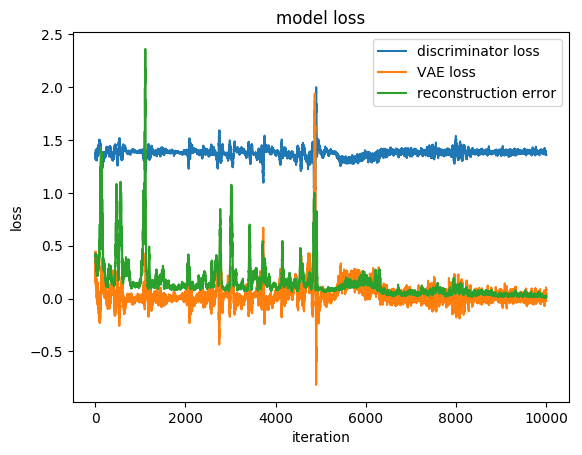

discriminator loss: 1.3568869
VAE loss: 0.0351057
reconstruction error: 0.022980409



Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00
  discriminator loss:    1.3987594
  vae loss:              -0.003763795
Progress: 100%|█████████████████████████████████████████| Time: 0:00:38
  discriminator loss:    1.3694968
  vae loss:              0.06932409
  reconstruction error:  0.015932335


In [5]:
# plot model loss
plot(model)
show()

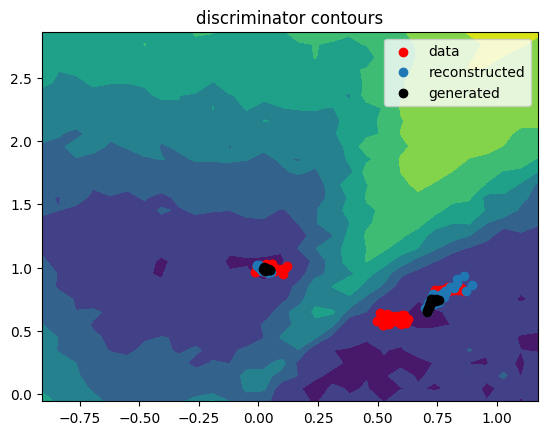

In [6]:
# plot recosntructed and generated samples
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)
Xrec = Flux.Tracker.data(model(X[:, Y.==0]))
Xgen = AnomalyDetection.generate(model, 30)

# also heatmap of the discriminator score
x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        _x = AnomalyDetection.Float.([x[j], y[i]])
        _z = AnomalyDetection.getcode(model, _x)
        zz[i,j] = Flux.Tracker.data(AnomalyDetection.discriminate(model, _x, _z))[1]
    end
end

f = figure()
contourf(x, y, zz)
scatter(X[1, Y.==0], X[2, Y.==0], c = "r", label = "data")
scatter(Xrec[1,:], Xrec[2,:], label = "reconstructed")
scatter(Xgen[1,:], Xgen[2,:], c = "k", label = "generated")
title("discriminator contours")
xlim(xl)
ylim(yl)
legend()
show()

In [7]:
model(nX)

Tracked 2×90 Array{Float32,2}:
 0.72149  0.721121  0.726238  0.724362  …  0.0407873  0.00463772  0.0178313
 0.72044  0.738975  0.787387  0.736017     0.965159   1.00051     0.986545 

In [8]:
nX

2×90 Array{Float32,2}:
 0.803442  0.804605  0.807145  0.819485  …  0.0350314  0.0613807  0.0685027
 0.821998  0.834235  0.826129  0.848182     0.973926   1.00745    0.973256 

In [9]:
AnomalyDetection.mu(model, nX)

Tracked 2×90 Array{Float32,2}:
 -0.00765818  -0.00706072  -0.00730106  …  0.102643  0.10482  0.0966123
 -0.832913    -0.829916    -0.83357        1.56668   1.55586  1.46419  

In [10]:
AnomalyDetection.sigma(model, nX)

Tracked 2×90 Array{Float32,2}:
 1.02238   1.02579   1.02293   1.0272    …  1.12733    1.1302     1.1174   
 0.674856  0.676022  0.674806  0.675535     0.0774716  0.0775764  0.0852897

In [11]:
AnomalyDetection.sample_z(model, nX)

Tracked 2×90 Array{Float32,2}:
 -1.77692  -0.640595   0.983755   0.764621  …  -0.17031  0.223739  -0.64474
 -1.69712  -0.42192   -0.662449  -0.83271       1.49741  1.71862    1.35366

In [12]:
# predict labels
AnomalyDetection.setthreshold!(model, X)
model.M = 20 # number of samples - for classification higher is better (more stable)
tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 0
 1
 1
 1
 0
 1
 1
 1
 0

In [13]:
AnomalyDetection.anomalyscore(model, X)

103-element Array{Float32,1}:
 0.236784
 0.23611 
 0.227149
 0.26998 
 0.271811
 0.229927
 0.255698
 0.248558
 0.249438
 0.227365
 0.254891
 0.265199
 0.255964
 ⋮       
 0.279378
 1.16518 
 1.19821 
 0.25976 
 0.990383
 0.330988
 0.571889
 0.259774
 0.405947
 0.38791 
 0.336733
 0.263461

In [14]:
# get the labels and roc stats
tryhat, tstyhat = AnomalyDetection.rocstats(dataset, dataset, model);


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 9
  tn = 90
  fp = 0
  fn = 4
precision: 1.0
f1score: 0.8181818181818182
recall: 0.6923076923076923
false positive rate: 0.0
equal error rate: 0.15384615384615385


In [15]:
# anomaly score contour plot
# get limits of the figure
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)

# compute the anomaly score on a grid
x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.anomalyscore(model, AnomalyDetection.Float.([x[j], y[i]]))
    end
end

# also generate some samples
xgen = AnomalyDetection.generate(model, 3);


 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 9
  tn = 90
  fp = 0
  fn = 4
precision: 1.0
f1score: 0.8181818181818182
recall: 0.6923076923076923
false positive rate: 0.0
equal error rate: 0.15384615384615385


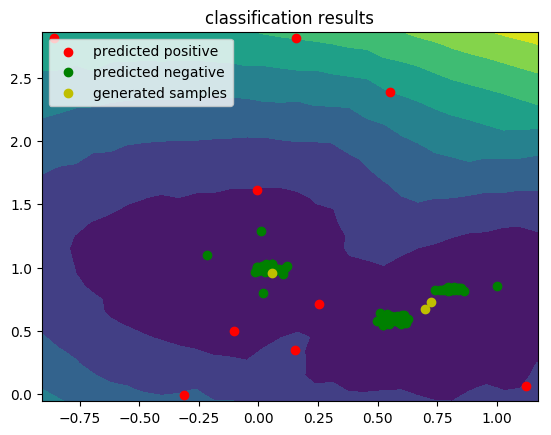

In [16]:
# plot it all
f = figure()
contourf(x, y, zz)
scatter(X[1, tryhat.==1], X[2, tryhat.==1], c = "r", 
    label = "predicted positive")
scatter(X[1, tryhat.==0], X[2, tryhat.==0], c = "g", 
    label = "predicted negative")
scatter(xgen[1,:], xgen[2, :], c = "y", 
    label = "generated samples")
title("classification results")
xlim(xl)
ylim(yl)
legend()
show()

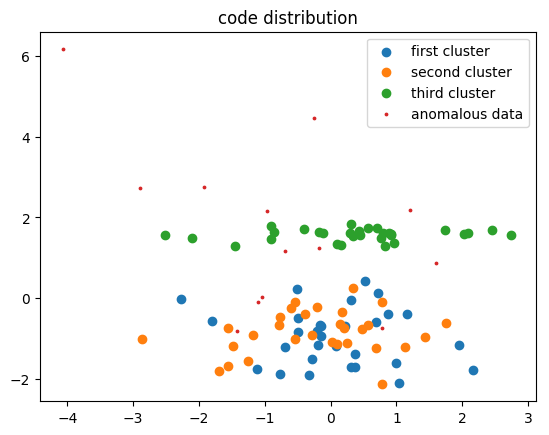

In [17]:
# what are the codes?
z1 = AnomalyDetection.getcode(model, X[:,1:30]).data
z2 = AnomalyDetection.getcode(model, X[:,31:60]).data
z3 = AnomalyDetection.getcode(model, X[:,61:90]).data
za = AnomalyDetection.getcode(model, X[:,91:end]).data

figure()
title("code distribution")
scatter(z1[1,:], z1[2,:], label = "first cluster")
scatter(z2[1,:], z2[2,:], label = "second cluster")
scatter(z3[1,:], z3[2,:], label = "third cluster")
scatter(za[1,:], za[2,:], s = 3, label = "anomalous data")
legend()
show()

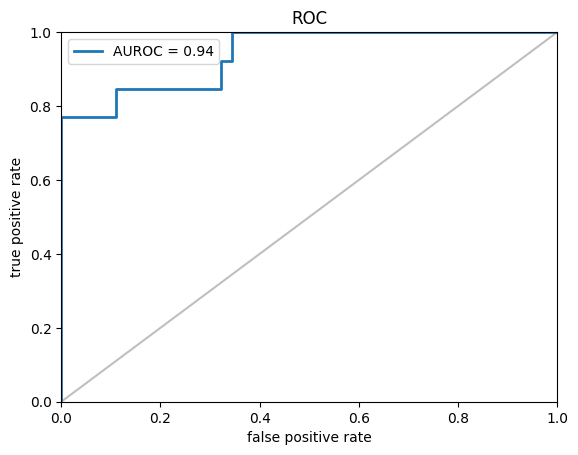

In [18]:
# plot ROC curve and compute AUROC score
ascore = AnomalyDetection.anomalyscore(model, X);
fprvec, tprvec = EvalCurves.roccurve(ascore, Y)
auroc = round(EvalCurves.auc(fprvec, tprvec),3)
EvalCurves.plotroc((fprvec, tprvec, "AUROC = $(auroc)"))
show()

In [19]:
using MLBase: false_positive_rate, false_negative_rate
n = 21
alphavec = linspace(0,1,n)
eervec = zeros(n)
for i in 1:n
    model.alpha = alphavec[i]
    AnomalyDetection.setthreshold!(model, X)
    tryhat, tsthat, trroc, tstroc = AnomalyDetection.rocstats(dataset.data, dataset.labels,
        dataset.data, dataset.labels, model, verb = false)
    eervec[i] = (false_positive_rate(tstroc) + false_negative_rate(tstroc))/2
end

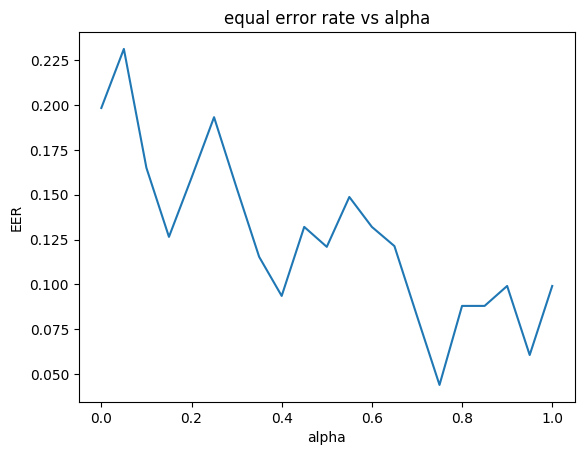

In [20]:
f = figure()
plot(alphavec, eervec)
title("equal error rate vs alpha")
xlabel("alpha")
ylabel("EER")
show()